### Summary
Every year, more than 140 million bookings made on the internet and many hotel bookings made through top-visited travel websites like Booking.com, Expedia.com, Hotels.com, etc. According to Google data, hotels are booked in advance of 12 weeks.

This dataset contains 31 features about booking information such as Average Daily Rate, Arrival Time, Room Type, Special Request, etc. between 2015 and 2017 years.

In this kernel, I would like to show some booking information details with exploratory data analysis, some feature engineering, reviewing correlations between features, hyperparameter tunning and visualizing most important features and their interesting distribution properties. As a result of all these analyses, I aim to find best model to predict hotel booking cancellations with tree-based algorithms based on rest of the features found in the dataset. The goal of predictive analysis is to avoid overfitting and find the model that has the highest accuracy.

### Boosting
Boosting refers to a family of algorithms that are able to convert weak learners to strong learners. The main principle of boosting is to fit a sequence of weak learners (models that are only slightly better than random guessing, such as small decision trees) to weighted versions of the data, where more weight is given to examples that were mis-classified by earlier rounds. The predictions are then combined through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction. The principal difference between boosting and the committee methods such as bagging is that base learners are trained in sequence on a weighted version of the data.

### Type of Boosting Algorithm
1. AdaBoost (Adaptive Boosting)
1. Gradient Tree Boosting
1. XGBoost

#### Download the dataset from here -> https://www.kaggle.com/jessemostipak/hotel-booking-demand
#### Find the same implementation in kaggle kernel -> https://www.kaggle.com/benai9916/boosting-gradientboost-adaboost-xgboost

## Load Library

In [96]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, auc, roc_curve, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

## Load Dataset

In [17]:
# Import Data

hotel_df = pd.read_csv('../input/hotel-booking-demand/hotel_bookings.csv')

In [18]:
# Show first 5 rows

hotel_df.head(5)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [19]:
# print some information about data

hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [20]:
# print the size of the data
hotel_df.shape

(119390, 32)

## Exploratory Data Analysis

What type of hotels ared booked most of the time

Text(0, 0.5, 'Count')

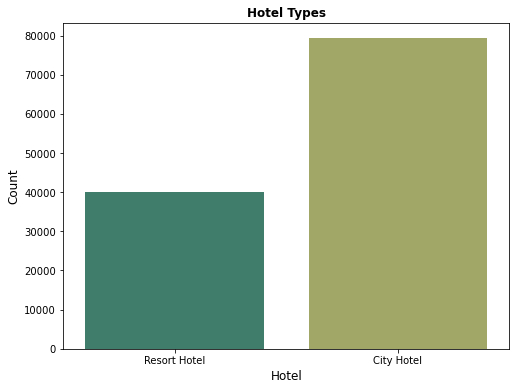

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='hotel', data = hotel_df, palette='gist_earth')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

Checked the number of booking canceled (Target variable)

Text(0, 0.5, 'Canceled or Not Canceled')

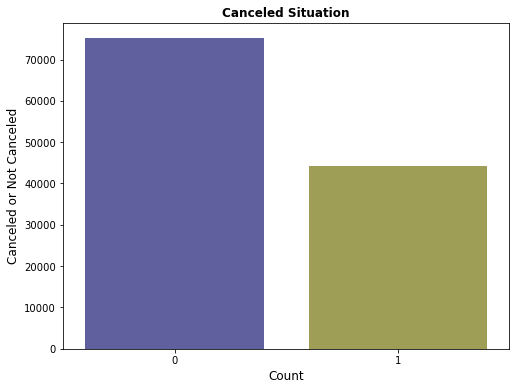

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x='is_canceled', data= hotel_df, palette='gist_stern')
plt.title('Canceled Situation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled or Not Canceled', fontsize=12)

Shows the relationship of arrival_date_year to lead_time with booking cancellation status.

Text(0, 0.5, 'Lead Time')

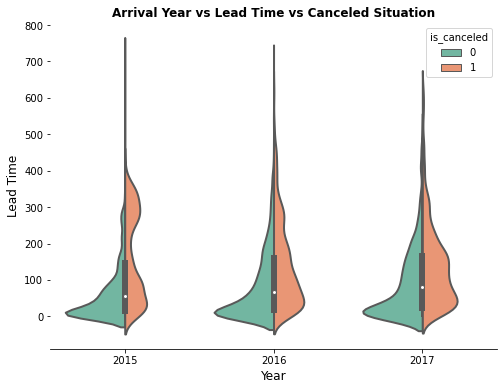

In [23]:
plt.figure(figsize=(8,6))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=hotel_df, palette="Set2", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

For canceled booking, means and interquartile ranges are similar in all years. But the shapes of the distributions are quite different from each other. On the other hand distribution of not-canceled booking are almost the same. For all years and every booking situation, the small number of large lead time values are pulling the mean up. It shows that the mean is higher than the median.

Another exploration is made for the arrival_date_month feature. First month names converted to the numbers. It will help easier analysis.

In [24]:
#`arrival_date_month` names converted to the numbers

hotel_df['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

Text(0, 0.5, 'Count')

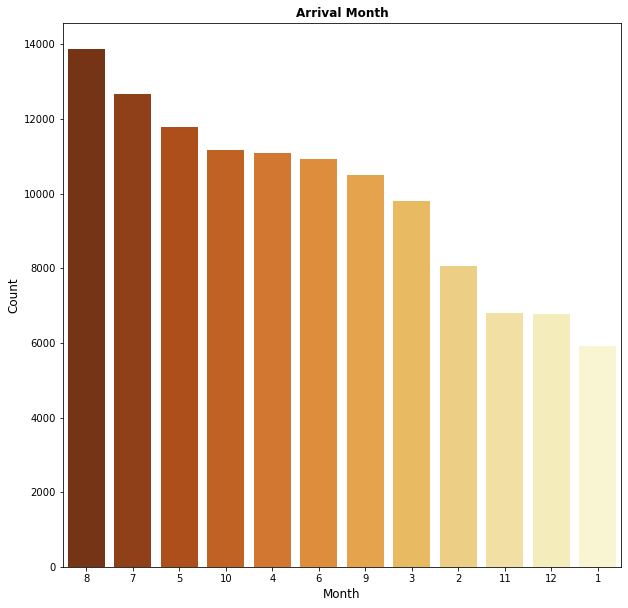

In [25]:
#`arrival_date_month` exploration 

plt.figure(figsize=(10,10))
sns.countplot(x='arrival_date_month', data = hotel_df,
              order=pd.value_counts(hotel_df['arrival_date_month']).index, palette='YlOrBr_r')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

The above graph is showing the number of bookings for each month. According to that, August is the busiest month and January is the most unoccupied month. It is half as busy as August.

Another important features which are related to time are stays_in_week_nights and stays_in_weekend_night features. 

In [26]:
# Table of `stay_in_weekend` and `stay_in_week_nights` features

pd.crosstab(index = hotel_df['stays_in_week_nights'],columns=hotel_df['stays_in_weekend_nights'], margins=True, margins_name = 'Total').iloc[:10]

stays_in_weekend_nights      0     1     2    3    4  5  6  7  8  9  10  12  \
stays_in_week_nights                                                          
0                          715  4569  2361    0    0  0  0  0  0  0   0   0   
1                        16451  7326  6533    0    0  0  0  0  0  0   0   0   
2                        17956  8979  6749    0    0  0  0  0  0  0   0   0   
3                        11564  6152  4542    0    0  0  0  0  0  0   0   0   
4                         4482  2412  2669    0    0  0  0  0  0  0   0   0   
5                          830  1188  8655  310   94  0  0  0  0  0   0   0   
6                            0     0   851  301  347  0  0  0  0  0   0   0   
7                            0     0   446  399  184  0  0  0  0  0   0   0   
8                            0     0   393  131  132  0  0  0  0  0   0   0   
9                            0     0    81   63   87  0  0  0  0  0   0   0   

stays_in_weekend_nights  13  14  16  18  19  Total  
stays_in_week_nights                                
0                         0   0   0   0   0   7645  
1                         0   0   0   0   0  30310  
2                         0   0   0   0   0  33684  
3                         0   0   0   0   0  22258  
4                         0   0   0   0   0   9563  
5                         0   0   0   0   0  11077  
6                         0   0   0   0   0   1499  
7                         0   0   0   0   0   1029  
8                         0   0   0   0   0    656  
9                         0   0   0   0   0    231

The above table brings an idea about creating a new feature. Which is indicated just_stay_weekend, just_stay_weekday and stay_both_weekday_and_weekday. These 715 values which are not assigned any feature, indicated as undefined_data.

In [27]:
## Creating new feature: `Weekday vs Weekend` 

pd.options.mode.chained_assignment = None
def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            hotel_df['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            hotel_df['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            hotel_df['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            hotel_df['weekend_or_weekday'].iloc[i] = 'undefined_data'

            
week_function(hotel_df['stays_in_weekend_nights'],hotel_df['stays_in_week_nights'], hotel_df)

Text(0, 0.5, 'Count')

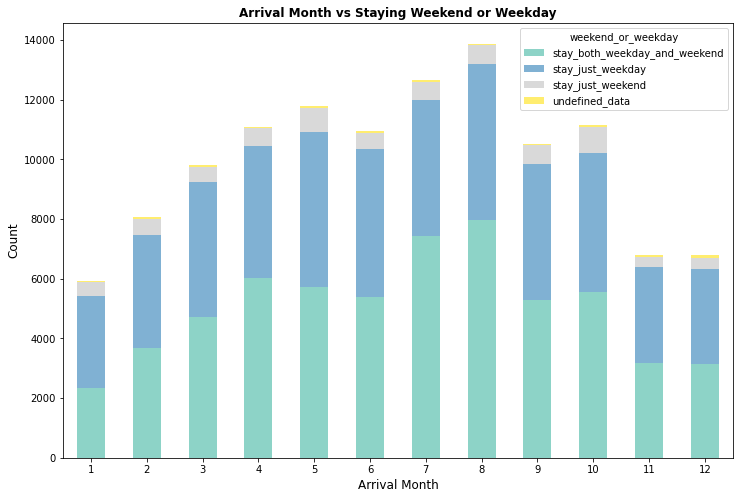

In [28]:
#`arrival_date_month` vs `weekend_or_weekday` graph 

hotel_df['arrival_date_month']= hotel_df['arrival_date_month'].astype('int64')
group_data = hotel_df.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)

group_data.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, cmap='Set3',figsize=(12,8))
plt.title('Arrival Month vs Staying Weekend or Weekday', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

Another feature engineering is made for children and babies features. Since, there is no obvious difference, these features gathered under the one feature which name is all_children.


In [29]:
# Create new feature:`all_children` with merge children and baby features

hotel_df['all_children'] = hotel_df['children'] + hotel_df['babies']
pd.crosstab(hotel_df['adults'], hotel_df['all_children'], margins=True, margins_name = 'Total')

all_children     0.0   1.0   2.0  3.0  9.0  10.0   Total
adults                                                  
0                180     4   205   14    0     0     403
1              22577   286   157    6    1     0   23027
2              81557  4658  3369   91    0     2   89677
3               5665   495    41    0    0     0    6201
4                 59     3     0    0    0     0      62
5                  2     0     0    0    0     0       2
6                  1     0     0    0    0     0       1
10                 1     0     0    0    0     0       1
20                 2     0     0    0    0     0       2
26                 5     0     0    0    0     0       5
27                 2     0     0    0    0     0       2
40                 1     0     0    0    0     0       1
50                 1     0     0    0    0     0       1
55                 1     0     0    0    0     0       1
Total         110054  5446  3772  111    1     2  119386

The below table shows frequency details about meal types according to the hotel types. Following the results, 67% of Bed&Breakfast booking made for City Hotel and almost every Full Board bookings made in the Resort Hotel.

In [30]:
# Groupby `Meal` and `Hotel` features

group_meal_data = hotel_df.groupby(['hotel','meal']).size().unstack(fill_value=0).transform(lambda x: x/x.sum())
group_meal_data.applymap('{:.2f}'.format)

meal            BB    FB    HB    SC Undefined
hotel                                         
City Hotel    0.67  0.06  0.44  0.99      0.00
Resort Hotel  0.33  0.94  0.56  0.01      1.00

The below graph gives information about the location which bookings made in.

Text(0, 0.5, 'Count')

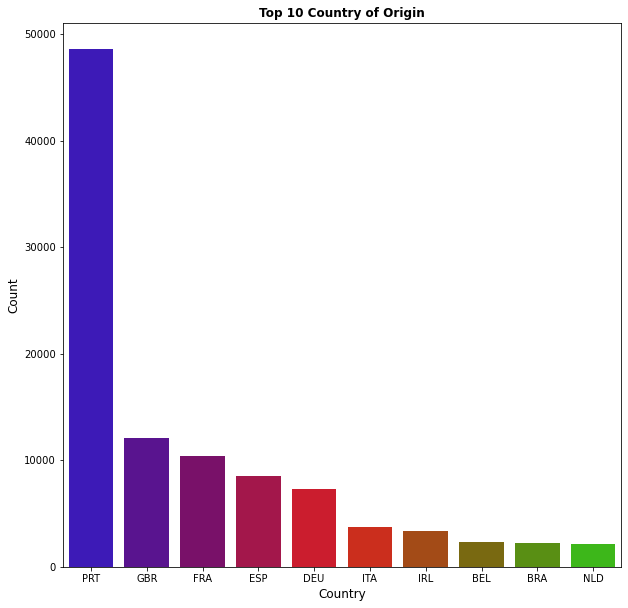

In [31]:
# Create Top 10 Country of Origin graph

plt.figure(figsize=(10,10))
sns.countplot(x='country', data=hotel_df, 
              order=pd.value_counts(hotel_df['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'ADR')

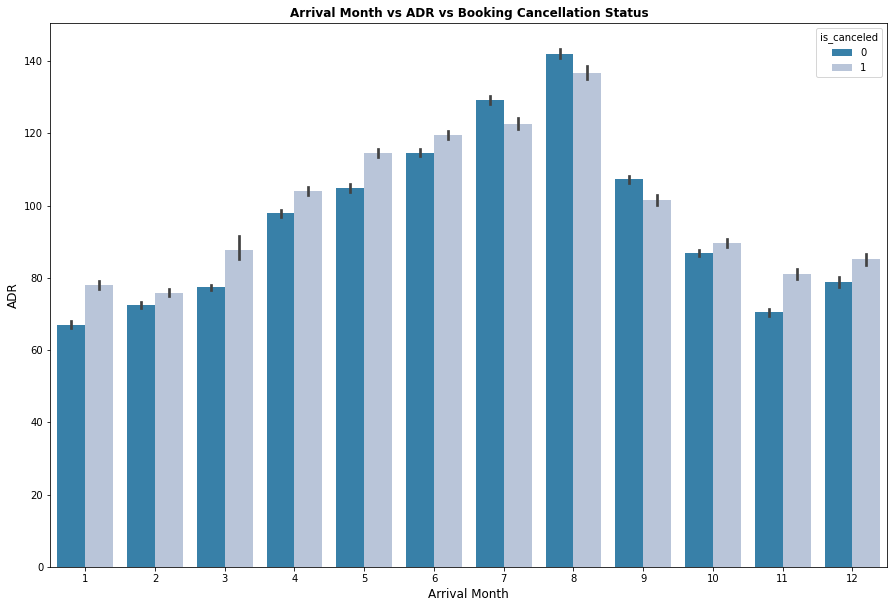

In [32]:
# `Arrival Month` vs `ADR` vs `Booking Cancellation Status`

hotel_df['adr'] = hotel_df['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette= 'PuBu_r', data=hotel_df)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

## Dealing with Missing Data and Correlation Matrix

In [33]:
## Display sum of null data

hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- company feature's 94% is missing so we will remove it
- children and all_children features have only 4 missing data so we will replace with 0
- country feature is missing less than 1%, these data will replace with most frequent value. 

In [34]:
# Fill missing data

hotel_df['children'] =  hotel_df['children'].fillna(0)
hotel_df['all_children'] =  hotel_df['all_children'].fillna(0)
hotel_df['country'] = hotel_df['country'].fillna(hotel_df['country'].mode().index[0])
hotel_df['agent']= hotel_df['agent'].fillna('0')
hotel_df=hotel_df.drop(['company'], axis =1)

In [35]:
# Change data type

hotel_df['agent']= hotel_df['agent'].astype(int)
#hotel_df['country']= hotel_df['country'].astype(O)

In [36]:
#Using Label Encoder method for categorical features

cols =  [cols for cols in hotel_df.columns if hotel_df[cols].dtype == 'O']

hotel_df.loc[:, cols] = hotel_df.loc[:, cols].astype(str).apply(LabelEncoder().fit_transform)

In [37]:
hotel_df.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342               2015                   7   
1      1            0        737               2015                   7   
2      1            0          7               2015                   7   
3      1            0         13               2015                   7   
4      1            0         14               2015                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  \
0                        0                     0       2  ...      0   
1                        0                     0       2  ...      0   
2                        0                     1       1  ...      0   
3                        0                     1       1  ...    304   
4                        0                     2       2  ...    240   

   days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                     0              2   0.0                            0   
1                     0              2   0.0                            0   
2                     0              2  75.0                            0   
3                     0              2  75.0                            0   
4                     0              2  98.0                            0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0                   1                      121   
1                          0                   1                      121   
2                          0                   1                      122   
3                          0                   1                      122   
4                          1                   1                      123   

   weekend_or_weekday  all_children  
0                   3           0.0  
1                   3           0.0  
2                   1           0.0  
3                   1           0.0  
4                   1           0.0  

[5 rows x 33 columns]

In [38]:
#Create new dataframe for categorical data

hotel_data_categorical = hotel_df[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status', 
                                     'weekend_or_weekday']]
hotel_data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   hotel                 119390 non-null  int64
 1   is_canceled           119390 non-null  int64
 2   arrival_date_month    119390 non-null  int64
 3   meal                  119390 non-null  int64
 4   country               119390 non-null  int64
 5   market_segment        119390 non-null  int64
 6   distribution_channel  119390 non-null  int64
 7   is_repeated_guest     119390 non-null  int64
 8   reserved_room_type    119390 non-null  int64
 9   assigned_room_type    119390 non-null  int64
 10  deposit_type          119390 non-null  int64
 11  agent                 119390 non-null  int64
 12  customer_type         119390 non-null  int64
 13  reservation_status    119390 non-null  int64
 14  weekend_or_weekday    119390 non-null  int64
dtypes: int64(15)
memory usage: 13.7 MB

In [39]:
#Create new dataframe for numerical data

hotel_data_numerical= hotel_df.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type','agent', 
                                       'customer_type','reservation_status',
                                       'weekend_or_weekday'], axis = 1)
hotel_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   arrival_date_year               119390 non-null  int64  
 2   arrival_date_week_number        119390 non-null  int64  
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  float64
 8   babies                          119390 non-null  int64  
 9   previous_cancellations          119390 non-null  int64  
 10  previous_bookings_not_canceled  119390 non-null  int64  
 11  booking_changes                 119390 non-null  int64  
 12  days_in_waiting_

In [40]:
# Correlation Matrix with Spearman method

plt.figure(figsize=(15,15))
corr_categorical=hotel_data_categorical.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))

sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

In [41]:
# Correlation Matrix with pearson method

plt.figure(figsize=(15,15))
corr_numerical=hotel_data_numerical.corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='RdBu', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title("Correlation Matrix Pearson Method- Numerical Data ",size=15, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix Pearson Method- Numerical Data ')

In [42]:
# Finding high correlated features

corr_mask_categorical = corr_categorical.mask(mask_categorical)
corr_values_categorical = [c for c in corr_mask_categorical.columns if any (corr_mask_categorical[c] > 0.90)]
corr_mask_numerical = corr_numerical.mask(mask_numerical)
corr_values_numerical = [c for c in corr_mask_numerical.columns if any (corr_mask_numerical[c] > 0.90)]
print(corr_values_categorical, corr_values_numerical)

[] ['children']


In [43]:
# drop the highly correlated features

hotel_df = hotel_df.drop(['reservation_status', 'children', 'reservation_status_date'], axis=1)

## Seperate target and predictor varaiable

In [44]:
# Seperate target variable

hotel_data_tunning = hotel_df
y = hotel_data_tunning.iloc[:,1]
x = pd.concat([hotel_data_tunning.iloc[:,0],hotel_data_tunning.iloc[:,2:30]], axis=1)

## Train test split

In [45]:
# train and test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [46]:
print('X train size: ', x_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', x_test.shape)
print('y test size: ', y_test.shape)

X train size:  (83573, 29)
y train size:  (83573,)
X test size:  (35817, 29)
y test size:  (35817,)


## Train Model

## Logistic Regression

In [48]:
# Create adaboost classifer object
lr = LogisticRegression()

# Train Adaboost Classifer
lr.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = lr.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
precision_score_lr =  precision_score(y_test, y_pred)
accuracy_score_lr = accuracy_score(y_test, y_pred)
print('The precision score is : ',round(precision_score_lr * 100,2), '%')
print('The accuracy score is : ',round(accuracy_score_lr * 100,2), '%')
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))

The precision score is :  68.78 %
The accuracy score is :  73.73 %

Classification Report TEST:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80     22478
           1       0.69      0.54      0.60     13339

    accuracy                           0.74     35817
   macro avg       0.72      0.70      0.70     35817
weighted avg       0.73      0.74      0.73     35817



## AdaBost Classifier

In [97]:
# base estimator (optional)
dt = DecisionTreeClassifier() 

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=250, base_estimator=dt,learning_rate=1.0, random_state=0)

# Train Adaboost Classifer
abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_lg = abc.predict(x_test)

The most important parameters are base_estimator, n_estimators and learning_rate.

In [98]:
precision_score_ab =  precision_score(y_test, y_pred_lg)
accuracy_score_ab = accuracy_score(y_test, y_pred_lg)
print('The precision score is : ',round(precision_score_ab * 100,2), '%')
print('The accuracy score is : ',round(accuracy_score_ab * 100,2), '%')
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred_lg))

The precision score of decision tree on TEST is :  85.71 %
The accuracy score of decision tree on TEST is :  87.31 %

Classification Report TEST:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     22478
           1       0.86      0.79      0.82     13339

    accuracy                           0.87     35817
   macro avg       0.87      0.86      0.86     35817
weighted avg       0.87      0.87      0.87     35817



## Gradient Boosting classifier

In [104]:
# create object
gbc= GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=10, min_samples_split=200, max_features='sqrt',random_state=10)

# Train Adaboost Classifer
gbc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_gbc = gbc.predict(x_test)

In [105]:
precision_score_gbc =  precision_score(y_test, y_pred_gbc)
accuracy_score_gbc = accuracy_score(y_test, y_pred_gbc)
print('The precision score  is : ',round(precision_score_gbc * 100,2), '%')
print('The accuracy score  is : ',round(accuracy_score_gbc * 100,2), '%')
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred_gbc))

The precision score  is :  85.67 %
The accuracy score  is :  84.43 %

Classification Report TEST:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88     22478
           1       0.86      0.70      0.77     13339

    accuracy                           0.84     35817
   macro avg       0.85      0.81      0.83     35817
weighted avg       0.85      0.84      0.84     35817



## XGBoost

In [93]:
xgbc = XGBClassifier(max_depth=13,n_estimators=300,learning_rate=0.5)
    
# Train Adaboost Classifer
xgbc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_xgbc = xgbc.predict(x_test)

In [101]:
precision_score_xgbc =  precision_score(y_test, y_pred_xgbc)
accuracy_score_xgbc = accuracy_score(y_test, y_pred_xgbc)
print('The precision score  is : ',round(precision_score_xgbc * 100,2), '%')
print('The accuracy score is : ',round(accuracy_score_xgbc * 100,2), '%')
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred_xgbc))

The precision score  is :  86.81 %
The accuracy score is :  89.35 %

Classification Report TEST:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     22478
           1       0.87      0.84      0.85     13339

    accuracy                           0.89     35817
   macro avg       0.89      0.88      0.89     35817
weighted avg       0.89      0.89      0.89     35817



## Cumulate accuracy score of all the models

In [107]:
print('Logistic Regression accuracy score is : ',round(accuracy_score_lr * 100,2), '%')
print('AdaBoost accuracy score is : ',round(accuracy_score_ab * 100,2), '%')
print('Gradient boosting  accuracy score  is : ',round(accuracy_score_gbc * 100,2), '%')
print('XGBoost accuracy score is : ',round(accuracy_score_xgbc * 100,2), '%')

Logistic Regression accuracy score is :  73.73 %
AdaBoost accuracy score is :  87.31 %
Gradient boosting  accuracy score  is :  84.43 %
XGBoost accuracy score is :  89.35 %
